## K- Nearest Neighbour Classifier

- What is next in the series?

     7,13,19,?

y = 2x+3
- What is this function?
    - f(1) = 5
    - f(2) = 7
    - f(3) = 9
    - f(x) = _


- What is oval in shape, white in color and breaks easily?


- In Belarusian language ( which I hope no one of you knows ):
   - Hot Pepper = гарачы перац
   - Pepper Chicken = курыны Перац
   - Chicken noodles = курыная локшына

What does **гарачы локшына** mean in Belarusian?


##### _Think about how you answered these questions?_

In [1]:
from sklearn.datasets import load_iris
from pylab import *
from IPython.display import Image
from sklearn.metrics import silhouette_score

In [2]:
import numpy as np

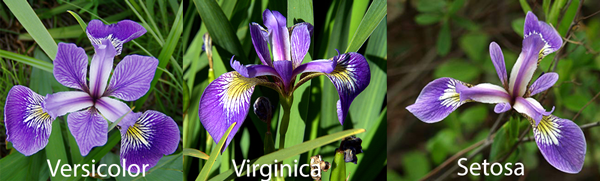

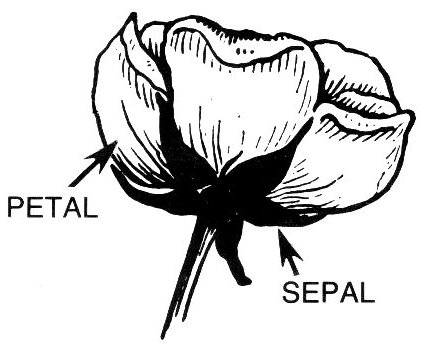

In [3]:
from IPython.display import Image, display

display(Image("irises.png",embed=True))
display(Image("petal_sepal_label.png",embed=True))


In [4]:
data = load_iris()

In [5]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [6]:
print data['DESCR']

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
x = lambda i:data['target']==i

In [8]:
target_0 = data['data'][x(0)]
target_1 = data['data'][x(1)]
target_2 = data['data'][x(2)]

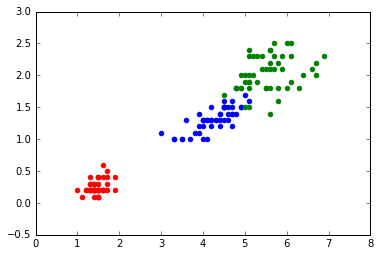

In [10]:
%matplotlib inline
scatter(target_0[:,2],target_0[:,3],color ='R')
scatter(target_1[:,2],target_1[:,3],color ='B')
scatter(target_2[:,2],target_2[:,3],color ='G')
show()

In [11]:
len(data['data'])

150

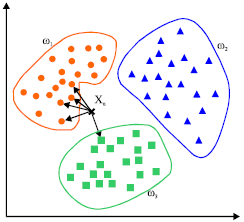

In [13]:
def knn_classifier(inX, dataset, labels, k=4):
    sos = np.array([sum(x) for x in (dataset-inX)**2]) # Sum of distances from the input to all the points in dataset
    knn_idx = sos.argsort()[:k]
    print knn_idx
    knn_labels = list(labels[knn_idx])
    print knn_labels
    label_counts = [(i,knn_labels.count(i)) for i in set(knn_labels)]
    print label_counts
    result = sorted(label_counts,key=lambda x:x[1],reverse=True)[0][0]
    return inX,result

Image('KNN.jpg')

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(data['data'],data['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [15]:
test = [ 5.6,  3. ,  6.8,  0.3]
#print knn_classifier(test,data['data'],data['target'],k=4)
print knn.predict([test])
print data['target_names'][knn.predict([test])]



[2]
['virginica']


In [16]:
knn.score(data['data'][:100],data['target'][:100])

0.96999999999999997

In [10]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(criterion='gini')
tree.fit(data['data'],data['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
tree.predict([ 5.6,  3. ,  6.8,  0.3])
tree.score(data['data'][:100],data['target'][:100])

c:\anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0.98999999999999999

In [20]:
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

In [22]:
export_graphviz(tree,'tree.dot')
gr = pydot.graph_from_dot_file('tree.dot')[0]
with open('tree.jpg','wb') as f:
    f.write(gr.create_jpeg())

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(data['data'],data['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
rf.predict([ 5.6,  3. ,  6.8,  0.3])

c:\anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [12]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(data['data'],data['target'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
svc.predict([ 5.6,  3. ,  6.8,  0.3])

c:\anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

In [ ]:
from sklearn.metrics import 

## K - Means clustering

In [4]:
def get_range_centroids(dataset,k):
    if len(dataset) == 0:
        return None
    features = dataset.shape[1]
    ranges = [ (max(dataset[:,x]) - min(dataset[:,x]))/k for x in range(features)]
    result = [ [round(ran * (i+1),2) for ran in ranges ]for i in range(k) ]
    return result

In [5]:
from random import choice
def get_rand_centroids(dataset,k):
    return [choice(dataset) for _ in range(k)]
    

In [6]:
def get_avg_centroids(dataset):
    features = dataset.shape[1]
    result = [dataset[:,i].mean() for i in range(features)]
    return result

In [7]:
def get_nearest_centroid(point,centroids):
    distances = np.array([sum((point - center)**2) for center in centroids])
    return distances.argsort()[0]

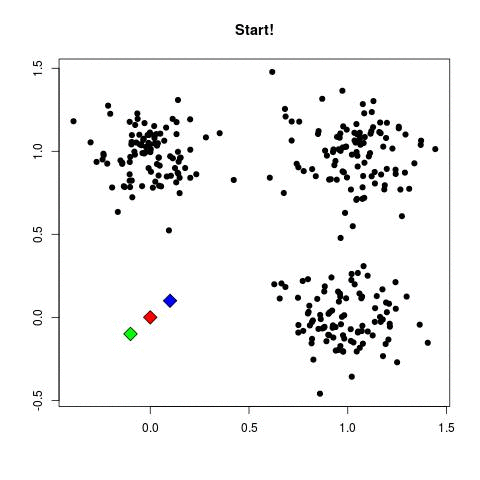

In [9]:
def kmeans_clusters(dataset,k=3,n=10,seed=get_rand_centroids):
    iteration = 0
    stable = False
    centroids = seed(dataset,k)
    clusters = np.array([])

    while (not stable and n > iteration ):
        #print "Centroids in Iteration {i} is {cen}".format(i = iteration,cen=centroids)
        iteration += 1
        new_clusters = np.array([get_nearest_centroid(row,centroids) for row in dataset])
        if np.array_equal(new_clusters,clusters):
            pass
        clusters = new_clusters.copy()
        
        for c in range(k):
            #print "Recalculating centroid %d"%(c)
            new_center = get_avg_centroids(dataset[clusters==c])
            #print "New co-ordinates for Centroid {it} is {point}".format(it=c,point=new_center)
            if new_center:
                centroids[c] = new_center
    return {'data':dataset,'labels':clusters,'centroids':centroids}
Image('Kmeans.gif.png')

In [23]:
original_centroids = [[ds[:,i].mean() for i in range(4)] for ds in [target_0,target_1,target_2]]

In [29]:
print original_centroids

[[5.0060000000000002, 3.4180000000000001, 1.464, 0.24399999999999999], [5.9359999999999999, 2.7700000000000005, 4.2599999999999998, 1.3259999999999998], [6.5879999999999983, 2.9740000000000002, 5.5520000000000005, 2.0260000000000002]]


In [13]:
from sklearn.cluster import KMeans
clf = KMeans(3)

In [14]:
clf.fit(data['data'])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [16]:
clf.predict([ 5.6,  3. ,  6.8,  0.3])

c:\anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

In [24]:
result = kmeans_clusters(data['data'],3,300)
print result['centroids']
y = lambda i:result['labels']==i
cluster_0 = result['data'][y(0)]
cluster_1 = result['data'][y(1)]
cluster_2 = result['data'][y(2)]

subplot(222,title="Actual centroids")
scatter(target_0[:,2],target_0[:,3],color ='R')
scatter(target_1[:,2],target_1[:,3],color ='B')
scatter(target_2[:,2],target_2[:,3],color ='G')
plot(original_centroids[0][2],original_centroids[0][3],'rx')
plot(original_centroids[1][2],original_centroids[0][3],'bx')
plot(original_centroids[2][2],original_centroids[0][3],'gx')

subplot(223, title="Predicted Centroids")
scatter(cluster_0[:,2],cluster_0[:,3],color ='c')
scatter(cluster_1[:,2],cluster_1[:,3],color ='y')
scatter(cluster_2[:,2],cluster_2[:,3],color ='k')   
plot(result['centroids'][0][2],result['centroids'][0][3],'cx')
plot(result['centroids'][1][2],result['centroids'][0][3],'yx')
plot(result['centroids'][2][2],result['centroids'][0][3],'kx')

show()
                          

[[6.8538461538461544, 3.0769230769230771, 5.7153846153846146, 2.0538461538461537], [5.8836065573770497, 2.7409836065573767, 4.3885245901639349, 1.4344262295081966], [5.0060000000000002, 3.4180000000000001, 1.464, 0.24399999999999999]]


In [32]:
from mpl_toolkits.mplot3d import Axes3D

In [42]:
result['data'][:,1]

array([ 3.5,  3. ,  3.2,  3.1,  3.6,  3.9,  3.4,  3.4,  2.9,  3.1,  3.7,
        3.4,  3. ,  3. ,  4. ,  4.4,  3.9,  3.5,  3.8,  3.8,  3.4,  3.7,
        3.6,  3.3,  3.4,  3. ,  3.4,  3.5,  3.4,  3.2,  3.1,  3.4,  4.1,
        4.2,  3.1,  3.2,  3.5,  3.1,  3. ,  3.4,  3.5,  2.3,  3.2,  3.5,
        3.8,  3. ,  3.8,  3.2,  3.7,  3.3,  3.2,  3.2,  3.1,  2.3,  2.8,
        2.8,  3.3,  2.4,  2.9,  2.7,  2. ,  3. ,  2.2,  2.9,  2.9,  3.1,
        3. ,  2.7,  2.2,  2.5,  3.2,  2.8,  2.5,  2.8,  2.9,  3. ,  2.8,
        3. ,  2.9,  2.6,  2.4,  2.4,  2.7,  2.7,  3. ,  3.4,  3.1,  2.3,
        3. ,  2.5,  2.6,  3. ,  2.6,  2.3,  2.7,  3. ,  2.9,  2.9,  2.5,
        2.8,  3.3,  2.7,  3. ,  2.9,  3. ,  3. ,  2.5,  2.9,  2.5,  3.6,
        3.2,  2.7,  3. ,  2.5,  2.8,  3.2,  3. ,  3.8,  2.6,  2.2,  3.2,
        2.8,  2.8,  2.7,  3.3,  3.2,  2.8,  3. ,  2.8,  3. ,  2.8,  3.8,
        2.8,  2.8,  2.6,  3. ,  3.4,  3.1,  3. ,  3.1,  3.1,  3.1,  2.7,
        3.2,  3.3,  3. ,  2.5,  3. ,  3.4,  3. ])

In [38]:
fig1 = plt.figure()
axes = Axes3D(fig1)

In [47]:
axes.scatter3D(result['data'][:,0],result['data'][:,1],result['data'][:,2])

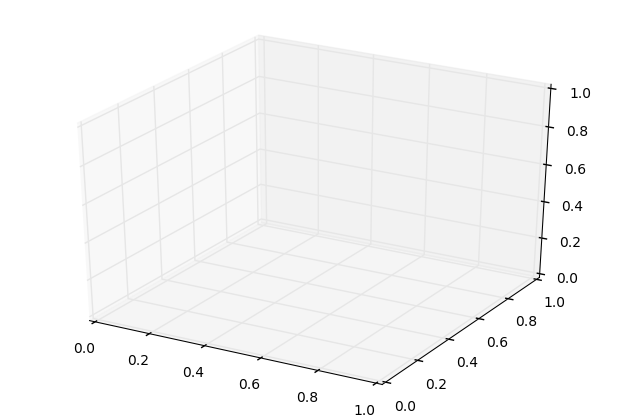

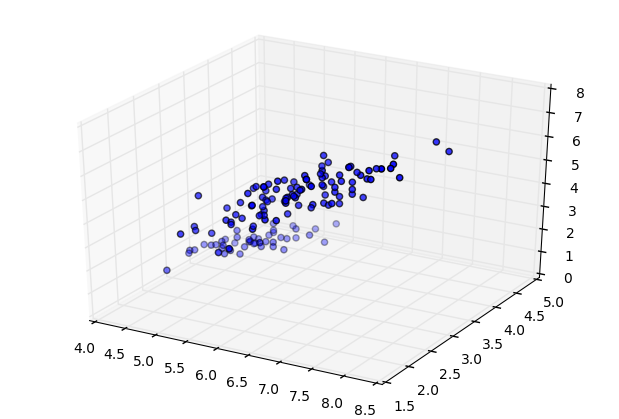

In [44]:
plt.show()

In [1]:

Image(url='http://scikit-learn.org/stable/_static/ml_map.png', width = 1000, height = 500)